In [10]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import seaborn as seabornInstance 
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv('loglik_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))

print(data)

0.3160503023091078
             A         B         C        D
0   106.092218  1.789340  45.32733  0.31478
1   114.110142  1.738364  44.51848  0.07224
2    67.115742  1.652795  44.32612  0.01430
3    71.672233  1.583762  44.69770  0.00526
4    90.909547  1.739032  44.30242  0.01505
..         ...       ...       ...      ...
74   87.593373  1.802471  44.78145  0.09942
75   52.631167  1.572969  44.77507  0.07369
76  107.433101  1.874277  44.36424  0.00708
77   44.077425  1.467471  44.17580  0.04911
78   67.595756  1.500005  44.40151  0.00523

[79 rows x 4 columns]


In [4]:
data.describe()

,A,B,C,D
count,79.000000,79.000000,79.00000,79.000000
mean,77.146636,1.726105,44.59162,0.054693
std,31.139747,0.321084,0.31605,0.058074
min,0.019373,0.019632,44.08426,0.001460
25%,57.198917,1.610346,44.33125,0.014100
50%,74.190983,1.693799,44.56043,0.034410
75%,94.577376,1.811180,44.79191,0.072965
max,230.115877,3.377548,45.67979,0.314780


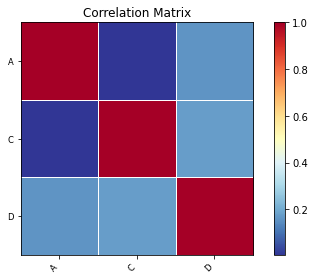

In [5]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.5055576985860193
intercepción b0 is 54.60299966072928


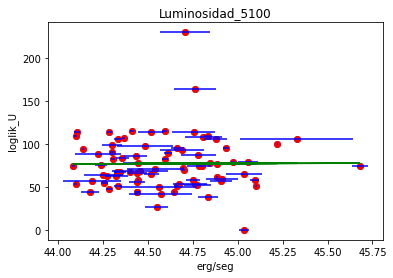

In [6]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('loglik_U')
plt.savefig("Luminosidad_5100_loglik_U.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'loglik_U')

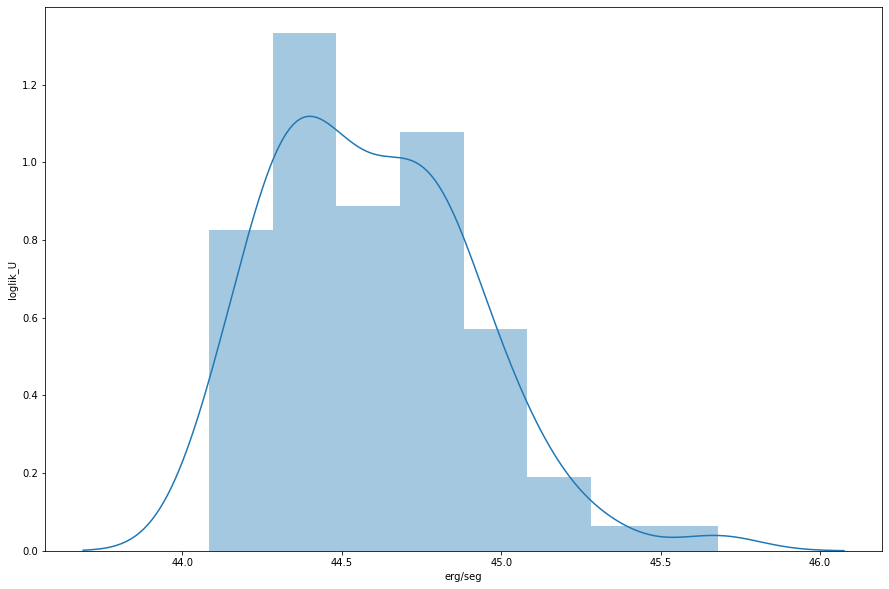

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')
plt.ylabel('loglik_U')

In [12]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)


Pendiente : [[ 0.5055577]
 [-0.1500014]
 [ 1.       ]]
Intercepción: [5.46029997e+01 8.41491034e+00 2.13162821e-14]
Errorcuadratico medio : 319.16124392131206
Raiz del error cuadratico medio:  17.86508449242018
 Coeficiente de determinacion R2 :  0.3406089135365362


In [13]:
data=pd.read_csv('loglik_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.3149958895049263
             A         B         C        D
0   130.202316  1.949627  45.32733  0.31478
1   149.906770  2.918206  44.51848  0.07224
2   105.104500  1.736560  44.32612  0.01430
3    98.717990  1.618173  44.69770  0.00526
4   125.089477  2.485903  44.30242  0.01505
..         ...       ...       ...      ...
76   79.302025  2.318572  44.36424  0.00708
77  142.622398  2.060666  44.17580  0.04911
78  125.122405  1.571475  44.40151  0.00523
79  101.864754  1.809948  44.20654  0.02390
80  125.646016  1.640120  44.59746  0.00671

[81 rows x 4 columns]


In [14]:
data.describe()

,A,B,C,D
count,81.000000,81.000000,81.000000,81.000000
mean,119.366633,2.094873,44.586938,0.053720
std,32.602331,0.411770,0.314996,0.057689
min,11.403672,1.571475,44.084260,0.001460
25%,103.470656,1.765244,44.331250,0.013930
50%,116.227187,1.971330,44.560430,0.032770
75%,130.225056,2.318572,44.784820,0.072240
max,262.777954,3.126875,45.679790,0.314780


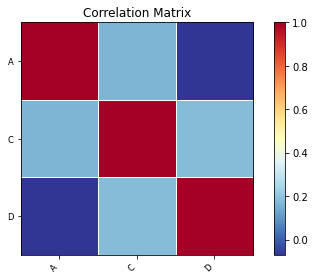

In [16]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  17.082643756330164
intercepción b0 is -642.2961411655184


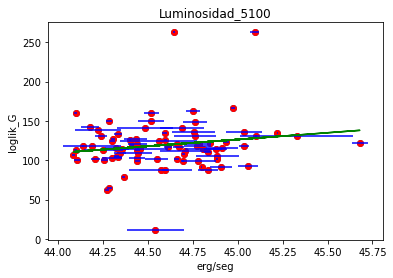

In [17]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('loglik_G')
plt.savefig("Luminosidad_5100_loglik_G.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'loglik_G')

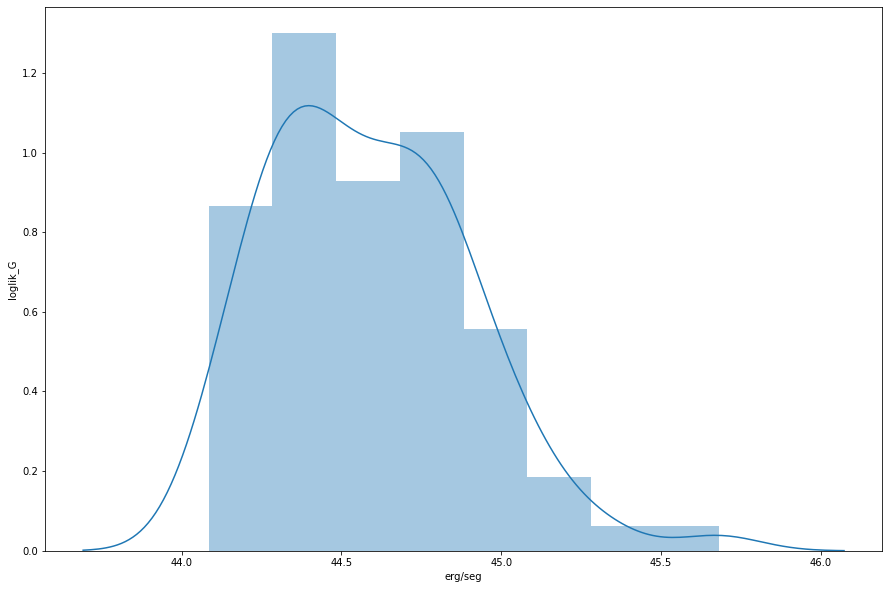

In [18]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')
plt.ylabel('loglik_G')

In [19]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[17.08264376]
 [ 0.09252374]
 [ 1.        ]]
Intercepción: [-6.42296141e+02 -2.03047724e+00  1.42108547e-14]
Errorcuadratico medio : 340.45299260364055
Raiz del error cuadratico medio:  18.45136831250302
 Coeficiente de determinacion R2 :  0.3440835423300199


In [20]:
data=pd.read_csv('loglik_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.31399638095223986
             A         B         C        D
0   154.399355  1.829780  45.32733  0.31478
1   150.212161  2.298551  44.51848  0.07224
2   109.168604  1.641570  44.32612  0.01430
3   117.038446  1.661915  44.69770  0.00526
4   131.885924  1.702738  44.30242  0.01505
..         ...       ...       ...      ...
79   71.170227  2.307091  44.20654  0.02390
80  158.449949  1.782129  44.59746  0.00671
81  137.917820  1.547206  44.17015  0.06091
82  106.393878  2.398750  44.31297  0.01773
83  119.673020  2.125404  44.52867  0.01500

[84 rows x 4 columns]


In [21]:
data.describe()

,A,B,C,D
count,84.000000,84.000000,84.000000,84.000000
mean,129.112243,3.266911,44.578021,0.052916
std,33.656928,12.257438,0.313996,0.056933
min,71.170227,1.517379,44.084260,0.001460
25%,109.237888,1.699880,44.325268,0.014185
50%,120.166763,1.781791,44.545520,0.032350
75%,143.435491,2.085872,44.782292,0.068227
max,306.959602,114.219733,45.679790,0.314780


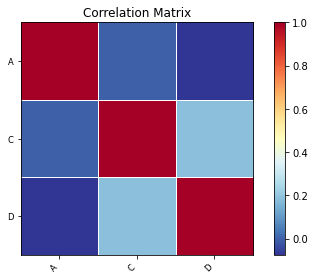

In [22]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  0.007064570637911309
intercepción b0 is 128.7973180975437


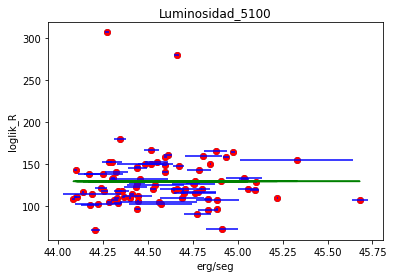

In [23]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('loglik_R')
plt.savefig("Luminosidad_5100_loglik_R.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'loglik_R')

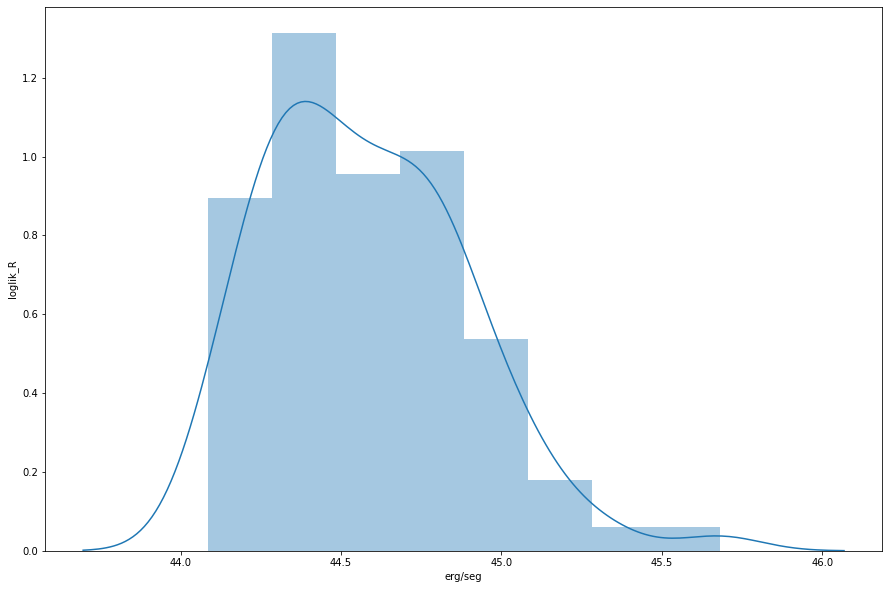

In [24]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')
plt.ylabel('loglik_R')

In [25]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[ 0.00706457]
 [-5.4449269 ]
 [ 1.        ]]
Intercepción: [128.7973181  245.99097543   0.        ]
Errorcuadratico medio : 421.62372076811204
Raiz del error cuadratico medio:  20.533478048497095
 Coeficiente de determinacion R2 :  0.3398183762359193


In [26]:
data=pd.read_csv('loglik_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.31585761136055107
             A         B         C        D
0   141.824069  3.040497  45.32733  0.31478
1   151.780281  2.574591  44.51848  0.07224
2    92.614660  1.641891  44.32612  0.01430
3   110.824485  2.394953  44.69770  0.00526
4   112.537535  2.833369  44.30242  0.01505
..         ...       ...       ...      ...
78   79.807502  2.168904  44.40151  0.00523
79  144.270285  2.269053  44.20654  0.02390
80  114.551377  2.619182  44.59746  0.00671
81  109.263898  1.813485  44.17015  0.06091
82  111.509776  2.350403  44.31297  0.01773

[83 rows x 4 columns]


In [27]:
data.describe()

,A,B,C,D
count,83.000000,83.000000,83.000000,83.000000
mean,122.238149,2.083447,44.578615,0.053373
std,33.989942,0.484274,0.315858,0.057124
min,79.680813,1.500235,44.084260,0.001460
25%,105.772178,1.668259,44.324415,0.014100
50%,115.073454,1.927249,44.549210,0.032770
75%,129.643197,2.350993,44.783135,0.069565
max,325.682354,3.343894,45.679790,0.314780


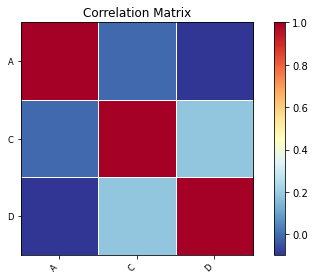

In [28]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  -0.4770302299033354
intercepción b0 is 143.50349629144947


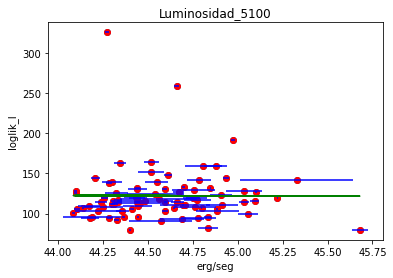

In [29]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('loglik_I')
plt.savefig("Luminosidad_5100_loglik_I.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'loglik_I')

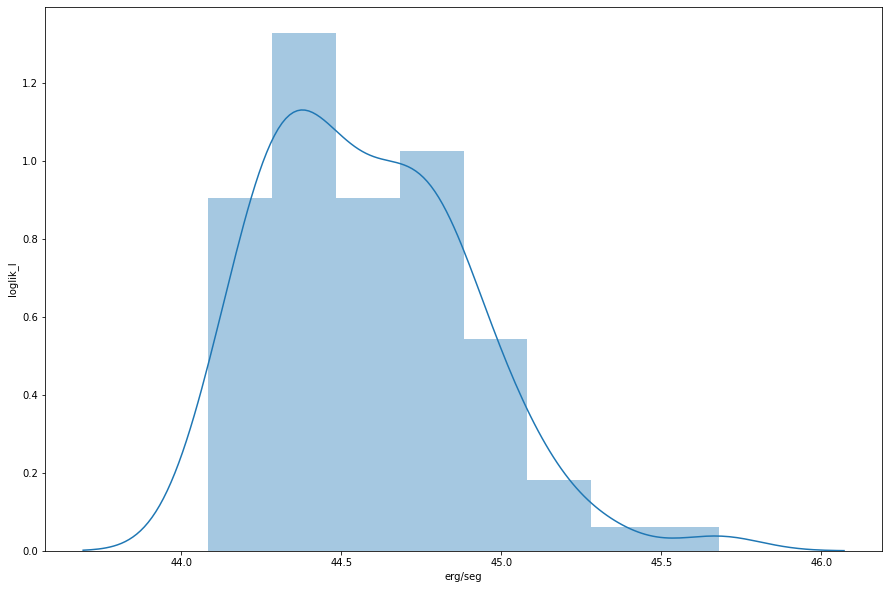

In [30]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')
plt.ylabel('loglik_I')

In [31]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-0.47703023]
 [-0.06589424]
 [ 1.        ]]
Intercepción: [1.43503496e+02 5.02092092e+00 7.10542736e-15]
Errorcuadratico medio : 380.53518251115105
Raiz del error cuadratico medio:  19.507311001548906
 Coeficiente de determinacion R2 :  0.33395559108364453


In [32]:
data=pd.read_csv('loglik_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1]
x=data.iloc[:,2]
z=data.iloc[:,3]
print(stats.stdev(x))
print(data)

0.31698102669081274
             A         B         C        D
0   137.892281  1.687340  45.32733  0.31478
1   113.125078  1.561252  44.51848  0.07224
2    54.439427  1.585758  44.32612  0.01430
3    65.567099  1.576602  44.69770  0.00526
4   100.513633  1.802875  44.30242  0.01505
..         ...       ...       ...      ...
75   36.862623  1.729207  44.77507  0.07369
76  120.631785  1.557431  44.36424  0.00708
77  108.378965  1.522773  44.17580  0.04911
78   57.735250  1.645357  44.40151  0.00523
79   83.256750  1.383682  44.20654  0.02390

[80 rows x 4 columns]


In [33]:
data.describe()

,A,B,C,D
count,80.000000,80.000000,80.000000,80.000000
mean,85.587335,2.609544,44.586806,0.054308
std,35.942851,7.891114,0.316981,0.057808
min,12.124854,1.376139,44.084260,0.001460
25%,62.606070,1.562590,44.329967,0.014185
50%,78.525484,1.611619,44.554820,0.033590
75%,100.916110,1.730047,44.788365,0.072603
max,282.225266,72.208055,45.679790,0.314780


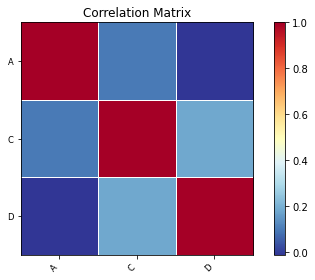

In [34]:
corr = data.set_index('B').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

pendiente b1  11.403203557967341
intercepción b0 is -422.8450921939754


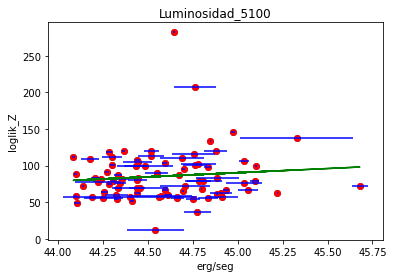

In [35]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_5100")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('loglik_Z')
plt.savefig("Luminosidad_5100_loglik_Z.pdf")

/home/didier/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'loglik_Z')

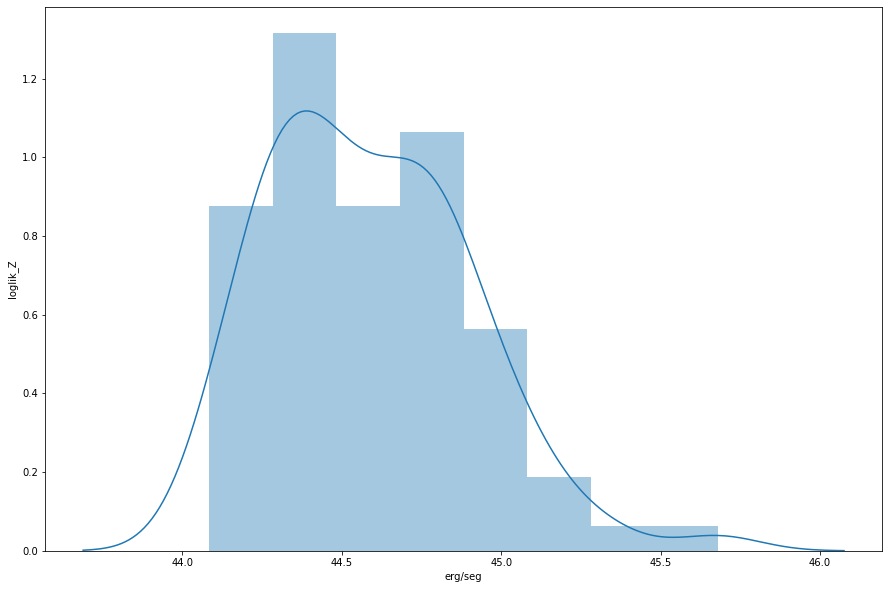

In [36]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['C'])
plt.xlabel('erg/seg')
plt.ylabel('loglik_Z')

In [37]:
x=np.array(data.iloc[:,2:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[11.40320356]
 [ 1.36746607]
 [ 1.        ]]
Intercepción: [-422.8450922   -58.36140068    0.        ]
Errorcuadratico medio : 441.38122533181627
Raiz del error cuadratico medio:  21.009074832838696
 Coeficiente de determinacion R2 :  0.33771022872953615
